<a href="https://colab.research.google.com/github/hargurjeet/holmusk_datascience_challenge/blob/main/Explainatory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chronic Kidney Disease Dataset Challenge

As part of this challange, longitudinal data has been provided with lab measurements for partients diagnosed with chronic kedney disease(CKD).

I have performed explainatory data analysis for a time interval to understand the importance of various features w.r.t to the progress in CKD stage.

# **Table Of Contents**<a name="Top"></a>


---



---


  1. [About the Dataset](#AboutDataset)
  2. [Data Pre Processing](#Data-Pre)
  3. [Exploring the dataset](#Exploring)
  4. [Summary](#Summary)
  5. [References](#References)

# **1: About the Dataset** <a name="AboutDataset"></a>


---

The dataset contains data of 300 patients. For each patients various medical parametes are caputred at different time intervals. A seprate CSV file is provide capturing the details at different time intervals.

Following are the details of csv file - 

- T_demo.csv
- T_creatinine.csv
- T_DBP.csv
- T_SBP.csv
- T_HGB.csv
- T_glucose.csv
- T_ldl.csv
- T_meds.csv
- T_stage.csv


# **2: Data Pre Processing** <a name="Data-Pre"></a>


---



I use the pandas library to import all the required datasets from github

In [1]:
import pandas as pd

In [2]:
demo = pd.read_csv('https://raw.githubusercontent.com/hargurjeet/holmusk_datascience_challenge/main/T_demo.csv')
cretinine = pd.read_csv('https://raw.githubusercontent.com/hargurjeet/holmusk_datascience_challenge/main/T_creatinine.csv')
dbp = pd.read_csv('https://raw.githubusercontent.com/hargurjeet/holmusk_datascience_challenge/main/T_DBP.csv')
sbp = pd.read_csv('https://raw.githubusercontent.com/hargurjeet/holmusk_datascience_challenge/main/T_SBP.csv')
hgb = pd.read_csv('https://raw.githubusercontent.com/hargurjeet/holmusk_datascience_challenge/main/T_HGB.csv')
glucose = pd.read_csv('https://raw.githubusercontent.com/hargurjeet/holmusk_datascience_challenge/main/T_glucose.csv')
ldl = pd.read_csv('https://raw.githubusercontent.com/hargurjeet/holmusk_datascience_challenge/main/T_ldl.csv')
meds = pd.read_csv('https://raw.githubusercontent.com/hargurjeet/holmusk_datascience_challenge/main/T_meds.csv')
stage = pd.read_csv('https://raw.githubusercontent.com/hargurjeet/holmusk_datascience_challenge/main/T_stage.csv')

As the patient paramters are spread across different time frames for simplicity I choose the intial or the first observation(t=0) for my analysis.

In [3]:
## merging all the dataframes
from functools import reduce
cretinine_t0 = cretinine[cretinine.time==0]
dbp_t0 = dbp[dbp.time==0]
sbp_t0 = sbp[sbp.time==0]
hgb_t0 = hgb[hgb.time==0]
glucose_t0 = glucose[glucose.time==0]
ldl_t0 = ldl[ldl.time==0]
all_dataframes = [demo, cretinine_t0, dbp_t0, sbp_t0, hgb_t0, glucose_t0, ldl_t0, stage]
df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['id'],
                                            how='left'), all_dataframes)

In [4]:
df_merged.head()

,id,race,gender,age,value_x,time_x,value_y,time_y,value_x,time_x,value_y,time_y,value_x,time_x,value_y,time_y,Stage_Progress
0,0,Unknown,Male,70,1.29,0,95.32,0,134.11,0,13.51,0,6.24,0,161.49,0,True
1,1,White,Female,71,1.74,0,72.49,0,157.46,0,13.89,0,9.96,0,89.57,0,False
2,2,White,Female,57,2.51,0,81.13,0,132.89,0,15.34,0,7.24,0,61.62,0,True
3,3,White,Male,74,0.74,0,80.09,0,147.46,0,13.74,0,6.43,0,99.71,0,False
4,4,White,Female,50,1.34,0,82.23,0,128.78,0,13.21,0,8.76,0,65.73,0,True


In [5]:
# Renaming relevant columns names
# dropping the unwanted columns
patient_info= df_merged.drop(columns=['time_x', 'time_y',], axis=1)
patient_info.columns = ['id', 'Race', 'Gender', 'Age', 'value_cretinine', 'value_dbp',
       'value_sbp', 'value_hgb', 'value_glucose', 'value_ldl', 'Stage_Progress']
patient_info.head()

,id,Race,Gender,Age,value_cretinine,value_dbp,value_sbp,value_hgb,value_glucose,value_ldl,Stage_Progress
0,0,Unknown,Male,70,1.29,95.32,134.11,13.51,6.24,161.49,True
1,1,White,Female,71,1.74,72.49,157.46,13.89,9.96,89.57,False
2,2,White,Female,57,2.51,81.13,132.89,15.34,7.24,61.62,True
3,3,White,Male,74,0.74,80.09,147.46,13.74,6.43,99.71,False
4,4,White,Female,50,1.34,82.23,128.78,13.21,8.76,65.73,True


In [6]:
patient_info.shape

(300, 11)

# **3: Exploring the dataset** <a name="Exploring"></a>


---



## Q: How many male and females are progressing with CDK stage

In [7]:
patient_info['Gender'].value_counts().index

Index(['Female', 'Male'], dtype='object')

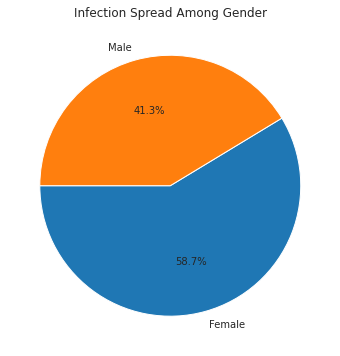

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.set_style('whitegrid')
plt.title('Infection Spread Among Gender')
plt.pie((patient_info['Gender'].value_counts()/(patient_info['Gender'].value_counts()[0] + patient_info['Gender'].value_counts()[1]))*100, labels=patient_info['Gender'].value_counts().index , autopct='%1.1f%%', startangle=180);

Out of 300 patients it seems Female seems to have higher chances of getting infected with CKD.

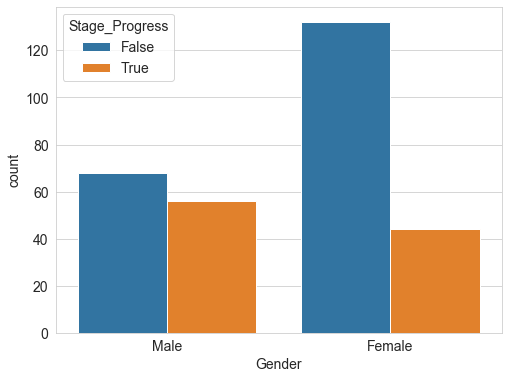

In [ ]:
plt.figure(figsize=(8,6))
ax = sns.countplot(x="Gender", hue ='Stage_Progress' ,data=patient_info)
plt.show()

It seems the CKD progress rate is seems to progressing for most of the male where the infection is not progressing for more that 50% of women. Hence Female seems to have better resistance to the infection

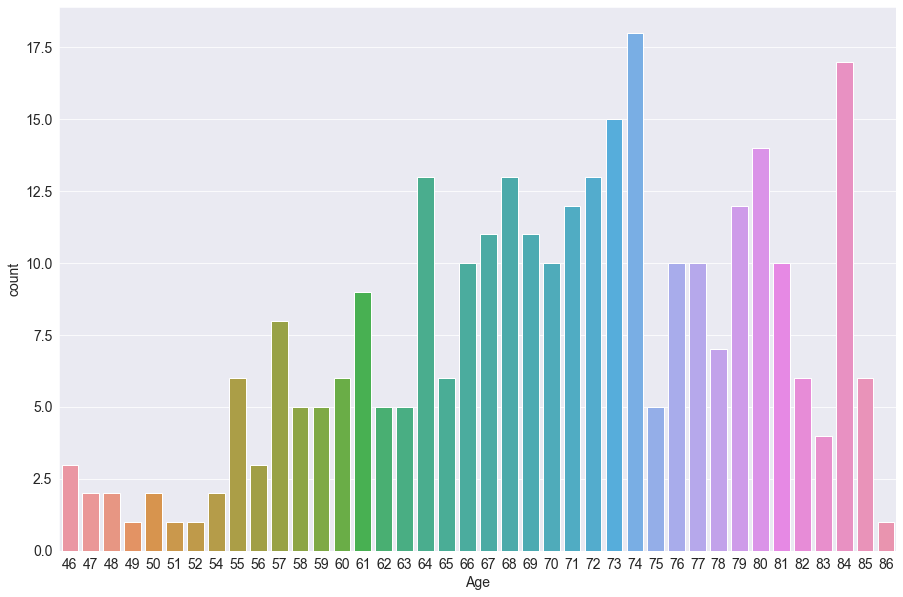

In [ ]:
import matplotlib
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (15, 10)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

ax = sns.countplot(x='Age', data=patient_info)
plt.show()

There seems to be increasing trend at the age of 60. I observe people with the age of 74 and 84 are maximum affected. Hence people with age below 60 seems to be getting less infected.

## Q: Does this disease has any relation with Race

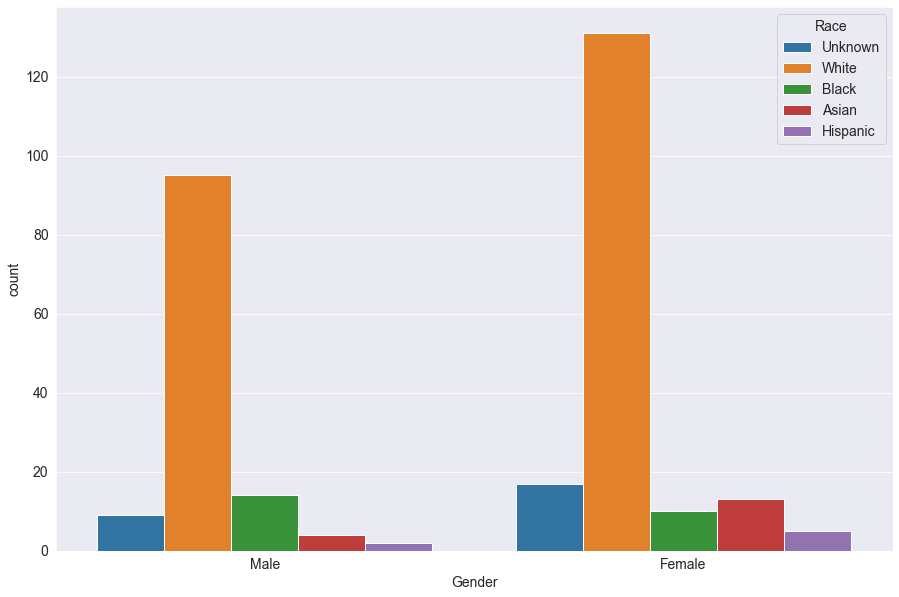

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.countplot(x="Gender", hue ='Race' ,data=patient_info)
plt.show()

Looks like people with race as white seems to be most affected. May be the dataset is skewed as we is no evdience of this infection affecting certain race.

## Q: Spread of DBP level across CKD infected patients

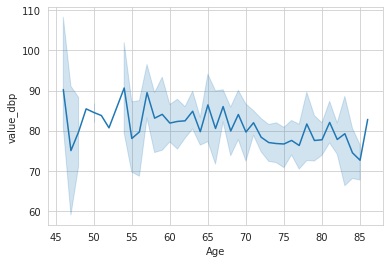

In [12]:
sns.lineplot(data=patient_info, x='Age', y='value_dbp') ;

I dont observ much varition across all ages, as the age increase this tends to shrink after the age 50. As we observed in eariler graphs Kindney infection seems to high at the age of 74 and 84, Whereas I observ here the DBP seems to be very low for the same ages. Both are inversly propotional to each other.

## Q: Spread of SBP level across CKD infected patients

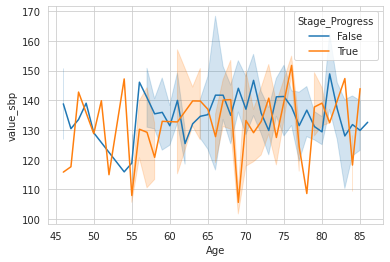

In [13]:
sns.lineplot(data=patient_info, x='Age', y='value_sbp', hue= 'Stage_Progress');

As the age increase the SBP level tends to increase for the infected patients as I observe higher spikes.
Apart from that No clear realitonship between SBP and the infection.

## Q: Creatinine level analysis acorss CKD infected patients

In [15]:
creatinine_level_men = patient_info[patient_info['Gender']=='Male']
creatinine_level_female = patient_info[patient_info['Gender']=='Female']

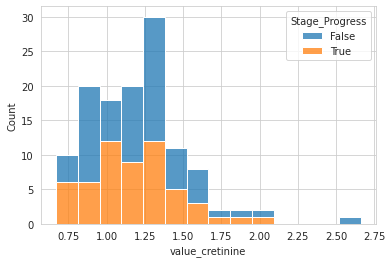

In [16]:
sns.histplot(data=creatinine_level_men, x="value_cretinine", hue='Stage_Progress', multiple="stack");

For men the ideal range of cretinine level is 0.7 to 1.25. I observ the following trends for male patients
- People with low level of cretinine(0.75) seems to have high infection
- People having high cretinine level beyond the ideal range are 50% likely to have this infection. 

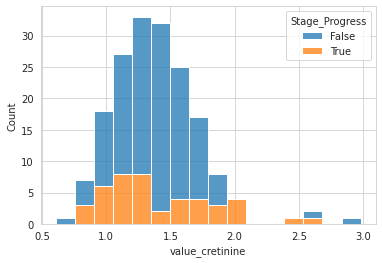

In [17]:
sns.histplot(data=creatinine_level_female, x="value_cretinine", hue='Stage_Progress', multiple="stack");

For female the ideal range is  0.5 to 1.0. Here I observ the following trends for female patients
- Female in ideal range and beyond upto 1.8 is less likely to have kidney infections.
- The infection trend seems to be incresting from 1.8 to 2.6
- Low infection rate for extermly high level of cretinine for both male and female.

## Q: Impace of Gluscose levels across CKD infected patinets

Ideal range for glucose level should be between 3.9 to 5.5. Hence I classify patients into 2 categories - Diabetic and Not diabetic

In [18]:
diabetic = patient_info.value_glucose.apply(lambda num: 'Not Diabetic' if num >=3.9 and num<=5.5 else 'Diabetic/PreDiabetic')

In [19]:
patient_info['Diabetic Y/N'] = diabetic

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [20]:
patient_info.head()

,id,Race,Gender,Age,value_cretinine,value_dbp,value_sbp,value_hgb,value_glucose,value_ldl,Stage_Progress,Diabetic Y/N
0,0,Unknown,Male,70,1.29,95.32,134.11,13.51,6.24,161.49,True,Diabetic/PreDiabetic
1,1,White,Female,71,1.74,72.49,157.46,13.89,9.96,89.57,False,Diabetic/PreDiabetic
2,2,White,Female,57,2.51,81.13,132.89,15.34,7.24,61.62,True,Diabetic/PreDiabetic
3,3,White,Male,74,0.74,80.09,147.46,13.74,6.43,99.71,False,Diabetic/PreDiabetic
4,4,White,Female,50,1.34,82.23,128.78,13.21,8.76,65.73,True,Diabetic/PreDiabetic


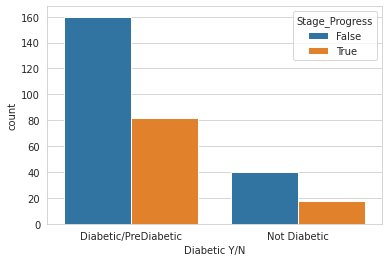

In [21]:
plt.figure(figsize=(6,4))
ax = sns.countplot(x="Diabetic Y/N", hue ='Stage_Progress' ,data=patient_info)
plt.show()

I conclude having patient being diabetic or non diabetic has no singnificant impact of infection spread. I now check if there is any relationship among gender

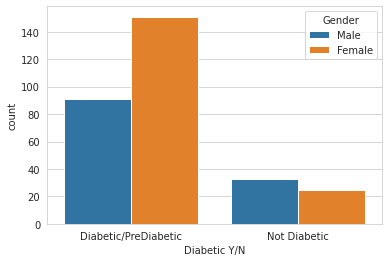

In [22]:
plt.figure(figsize=(6,4))
ax = sns.countplot(x="Diabetic Y/N", hue ='Gender' ,data=patient_info)
plt.show()

In [23]:
female_diabetic = patient_info[patient_info['Gender']=='Female']
male_diabetic = patient_info[patient_info['Gender']=='Male']

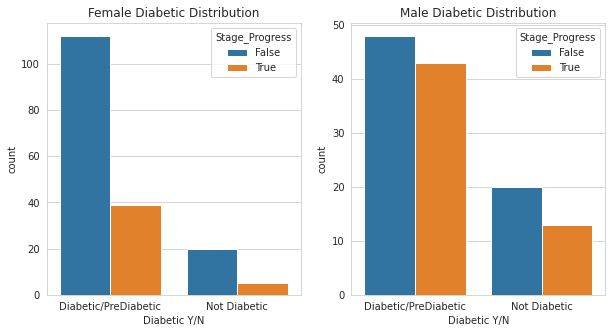

In [24]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(10,5))
# fig.suptitle('Bigger 1 row x 2 columns axes with no data')

sns.countplot(ax=axes[0], x=female_diabetic['Diabetic Y/N'], hue ='Stage_Progress' ,data=patient_info)
ax=axes[0].set_title('Female Diabetic Distribution')

sns.countplot(ax=axes[1], x=male_diabetic['Diabetic Y/N'], hue ='Stage_Progress' ,data=patient_info)
ax=axes[1].set_title('Male Diabetic Distribution')


From the above analysis it is evident that male Diabetic patients have higher chances CKD infection.

# **4: Summary** <a name="Summary"></a>


---



Here is the summary of activites I performed over the dataset

- Loaded the data to pandas dataframe and perfomed pre processing to bring all the patients parameters in one dataframe.

- Performed EDA on different patient parameters and concluded the following
  - Female seems to have higher chances of getting CKD but data shows that CKD progress is more in male patients as Female patients tends to show more resistance to the infection.

  - Dataset seems to be skewed as I observe high no of CKD infections against a particular race.

  - DBP levels and infection seems to be inversly proportional to each other. At higher age DBP level seems to decrease but infection level seems to increase

  - There is higher variation of SBP level for the patients progressing with CKD stages.

  - Higher no of patinets are progressing wtih CKD where creatinine level is low. Patinets beyond the ideal cretinine levels seems to have 50% chance of progressing with CKD.

  - Diabetic patient seems to have higher chances of CKD infection.

# **5: References** <a name="References"></a>


---



- https://en.wikipedia.org/wiki/Chronic_kidney_disease

- https://www.davita.com/education/kidney-disease/symptoms/infections-and-chronic-kidney-disease

- https://www.nature.com/articles/s41598-020-59794-7#:~:text=Accumulating%20evidence%20indicates%20that%20infection,of%20subsequent%20short%2Dterm%20mortality.

- https://pandas.pydata.org/docs/

- https://seaborn.pydata.org/